In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import os

## Prepare data

In [32]:
data = pd.read_csv(os.path.join(os.getcwd(), 'banknote_authentication.txt'), names=['variance', 'skewness', 'curtosis',
                                                                                    'entropy', 'class'])

In [33]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [105]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1098, 4) (136, 4) (138, 4)
(1098,) (136,) (138,)


In [106]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1,)
y_test = y_test.values.reshape(-1,)

In [107]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()

In [108]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Models

In [109]:
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('relu'),
    keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('sigmoid')
])
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_22 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
_________________________________________________________________
activation_23 (Activation)   (None, 1)                 0         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [111]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [112]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=[X_val, y_val], callbacks=[early_stop])

Train on 1098 samples, validate on 136 samples
Epoch 1/1000
1098/1098 [==============================] - 1s 783us/step - loss: 0.8271 - acc: 0.3898 - val_loss: 0.7948 - val_acc: 0.3971
Epoch 2/1000
1098/1098 [==============================] - 0s 82us/step - loss: 0.7938 - acc: 0.4372 - val_loss: 0.7678 - val_acc: 0.4485
Epoch 3/1000
1098/1098 [==============================] - 0s 80us/step - loss: 0.7660 - acc: 0.4563 - val_loss: 0.7452 - val_acc: 0.5074
Epoch 4/1000
1098/1098 [==============================] - 0s 70us/step - loss: 0.7414 - acc: 0.5137 - val_loss: 0.7241 - val_acc: 0.5368
Epoch 5/1000
1098/1098 [==============================] - 0s 81us/step - loss: 0.7188 - acc: 0.5956 - val_loss: 0.7048 - val_acc: 0.5809
Epoch 6/1000
1098/1098 [==============================] - 0s 91us/step - loss: 0.6973 - acc: 0.6321 - val_loss: 0.6863 - val_acc: 0.6029
Epoch 7/1000
1098/1098 [==============================] - 0s 71us/step - loss: 0.6754 - acc: 0.6621 - val_loss: 0.6680 - val_acc: 

1098/1098 [==============================] - 0s 59us/step - loss: 0.1933 - acc: 0.9791 - val_loss: 0.2238 - val_acc: 0.9706
Epoch 61/1000
1098/1098 [==============================] - 0s 61us/step - loss: 0.1929 - acc: 0.9781 - val_loss: 0.2235 - val_acc: 0.9706
Epoch 62/1000
1098/1098 [==============================] - 0s 63us/step - loss: 0.1926 - acc: 0.9781 - val_loss: 0.2231 - val_acc: 0.9706
Epoch 63/1000
1098/1098 [==============================] - 0s 67us/step - loss: 0.1923 - acc: 0.9781 - val_loss: 0.2226 - val_acc: 0.9706
Epoch 64/1000
1098/1098 [==============================] - 0s 59us/step - loss: 0.1920 - acc: 0.9781 - val_loss: 0.2220 - val_acc: 0.9779
Epoch 65/1000
1098/1098 [==============================] - 0s 55us/step - loss: 0.1917 - acc: 0.9781 - val_loss: 0.2213 - val_acc: 0.9779
Epoch 66/1000
1098/1098 [==============================] - 0s 57us/step - loss: 0.1914 - acc: 0.9781 - val_loss: 0.2209 - val_acc: 0.9779
Epoch 67/1000
1098/1098 [=======================

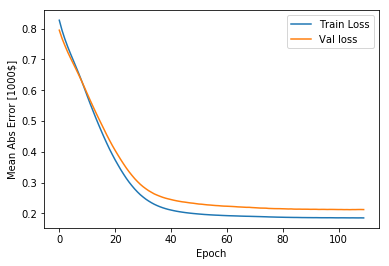

In [113]:
plot_history(history)

In [118]:
pred = np.round(model.predict(X_test).reshape(-1,))
accuracy_score(pred, y_test)

0.9782608695652174

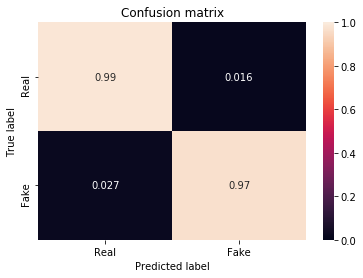

In [131]:
mat = confusion_matrix(pred, y_test)
cm = mat / np.sum(mat, axis=1)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])